In [7]:
import cv2
import librosa
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Spectrogram Oluşturma

In [9]:
def create_spectrogram(y):
  spec = librosa.feature.melspectrogram(y = y)
  spec_conv = librosa.amplitude_to_db(spec, ref = np.max)  
  return spec_conv


# Görüntü İşleme

In [10]:
def spectrogram_change(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    res_img = np.zeros((374, 500))
    normalize_img = cv2.normalize(img, res_img, 0, 100, cv2.NORM_MINMAX)

    scale_percent = 60
    width = int(normalize_img.shape[1] * scale_percent / 100)
    height = int(normalize_img.shape[0] * scale_percent / 100)
    dim = (width, height)

    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    
    return resized


In [11]:
def load_images_from_folder(folder, label):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append([spectrogram_change(img), label])
    return images


In [12]:
folders_path = "/content/drive/MyDrive/main/0"
arr_0 = np.array((load_images_from_folder(folders_path, 0)))

folders_path = "/content/drive/MyDrive/main/1"
arr_1 = np.array((load_images_from_folder(folders_path, 1)))

folders_path = "/content/drive/MyDrive/main/2"
arr_2 = np.array((load_images_from_folder(folders_path, 2)))

folders_path = "/content/drive/MyDrive/main/3"
arr_3 = np.array((load_images_from_folder(folders_path, 3)))

folders_path = "/content/drive/MyDrive/main/4"
arr_4 = np.array((load_images_from_folder(folders_path, 4)))

folders_path = "/content/drive/MyDrive/main/5"
arr_5 = np.array((load_images_from_folder(folders_path, 5)))

folders_path = "/content/drive/MyDrive/main/6"
arr_6 = np.array((load_images_from_folder(folders_path, 6)))

folders_path = "/content/drive/MyDrive/main/7"
arr_7 = np.array((load_images_from_folder(folders_path, 7)))

folders_path = "/content/drive/MyDrive/main/8"
arr_8 = np.array((load_images_from_folder(folders_path, 8)))

folders_path = "/content/drive/MyDrive/main/9"
arr_9 = np.array((load_images_from_folder(folders_path, 9)))

np_arr = np.concatenate([arr_0, arr_1, arr_2, arr_3, arr_4, arr_5, arr_6, arr_7, arr_8, arr_9], axis = 0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
 

In [13]:
df = pd.DataFrame(np.array(np_arr), columns = ['features', 'class'])
df.size

17476

In [14]:
df.shape

(8738, 2)

In [15]:
X = np.array(df['features'].tolist())
y = np.array(df['class'].tolist())

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_temporary, y_train, y_temporary = train_test_split(X,y, train_size=0.8) 
X_val, X_test, y_val, y_test = train_test_split(X_temporary, y_temporary, train_size=0.5)

In [17]:
print(X_train.shape, X_test.shape,  X_val.shape, y_train.shape, y_test.shape, y_val.shape)


(6990, 224, 300, 3) (874, 224, 300, 3) (874, 224, 300, 3) (6990,) (874,) (874,)


In [18]:
X_test[100].shape

(224, 300, 3)

In [19]:
# X_train = X_train / 255
# X_val = X_val / 255
# X_test = X_test / 255

# CNN

In [20]:
# Create a model object
model = tf.keras.Sequential()

In [21]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size = (3, 3),
                                 strides = (1, 1),
                                 padding = "same",
                                 activation = "relu",
                                 input_shape = (224, 300, 3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))


In [22]:
# Add more convolution and max pooling layers
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3, 3),
                                 strides = (1, 1),
                                 padding = "same",
                                 activation = "relu"))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3, 3),
                                 strides = (1, 1),
                                 padding = "same",
                                 activation = "relu"))


In [23]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

In [24]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [25]:
# Add the output layer
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

In [26]:
# Compile the model
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [27]:
results = model.fit(X_train, y_train,
                    batch_size = 128,
                    epochs = 50,
                    validation_data = (X_val, y_val))

#EPOCHS = 50, BATCH_SIZE = 128 ==>  11.9 DK


Epoch 1/50
55/55 [==============================] - 30s 295ms/step - loss: 14.1254 - accuracy: 0.1628 - val_loss: 2.0446 - val_accuracy: 0.2712
Epoch 2/50
55/55 [==============================] - 13s 232ms/step - loss: 2.1796 - accuracy: 0.2077 - val_loss: 2.0141 - val_accuracy: 0.3146
Epoch 3/50
55/55 [==============================] - 13s 234ms/step - loss: 2.0807 - accuracy: 0.2378 - val_loss: 1.9458 - val_accuracy: 0.3936
Epoch 4/50
55/55 [==============================] - 13s 235ms/step - loss: 2.0089 - accuracy: 0.2642 - val_loss: 1.9086 - val_accuracy: 0.3524
Epoch 5/50
55/55 [==============================] - 13s 236ms/step - loss: 1.9376 - accuracy: 0.2857 - val_loss: 1.7277 - val_accuracy: 0.4565
Epoch 6/50
55/55 [==============================] - 13s 240ms/step - loss: 1.8715 - accuracy: 0.3142 - val_loss: 1.7110 - val_accuracy: 0.4531
Epoch 7/50
55/55 [==============================] - 13s 241ms/step - loss: 1.7937 - accuracy: 0.3415 - val_loss: 1.5696 - val_accuracy: 0.466

In [28]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 

Saved model to disk


In [29]:
from tensorflow.keras.models import model_from_json

 # load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# # evaluate loaded model on test data
# loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# score = loaded_model.evaluate(X, y, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk


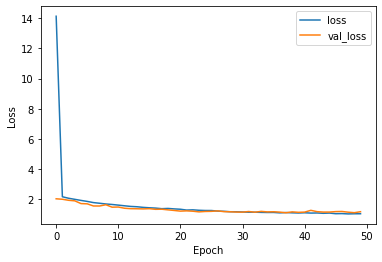

In [30]:
# Plot the the training loss
plt.plot(results.history["loss"], label = "loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label = "val_loss")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

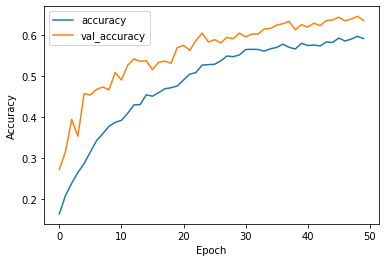

In [31]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label = "accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label = "val_accuracy")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [32]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 1s 32ms/step - loss: 1.2299 - accuracy: 0.6430


[1.2298721075057983, 0.6430205702781677]

In [33]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[100].reshape(1, 224, 300, 3))

# Print the prediction result
prediction_result


array([[0.07516222, 0.05993808, 0.23758942, 0.15579109, 0.03305033,
        0.11370351, 0.01352883, 0.02340234, 0.04282834, 0.24500592]],
      dtype=float32)

In [34]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

In [35]:
# Print the results
print(f"""This image belongs to class {predicted_class}\
 with {predicted_probability}%""")

This image belongs to class 9 with 0.24500592052936554%
